data: https://www.kaggle.com/datasets/abdallahwagih/telco-customer-churn/data


--------------------------------- **Início do Projeto**  ---------------------------------

**Planejamento e Ambiente**

In [1]:
# Instalar dependência necessária para leitura de arquivos Excel
%pip install openpyxl

# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

import os
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir())


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\alex_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Current working directory: c:\Users\alex_\Desktop\PE33\Projetos PE33\Projeto 3 - Churn\analise
Files in current directory: ['Análise_churn_telco_customer.ipynb', 'colunas_categoricas.json', 'colunas_do_modelo.json', 'colunas_numericas.json', 'curva_ROC.png', 'README.md', 'Telco_customer_churn.xlsx']



--------------------------------- 33 --------------------------------- 33 ---------------------------------

**Análise Exploratória de Dados (EDA) - Entendendo o Negócio**

In [9]:
# Carregamento e Inspeção Inicial
# ATENÇÃO: Substitua 'caminho/para/seu/arquivo.xlsx' pelo local correto do seu arquivo.
# Exemplo: df = pd.read_excel('caminho/para/seu/arquivo/Telco-customer-churn.xlsx')
df = pd.read_excel('Telco_customer_churn.xlsx')

# Substitui todos os espaços por underscores em TODOS os nomes de colunas
df.columns = df.columns.str.replace(' ', '_')
# Visualizar as 5 primeiras e as 5 últimas linhas
print("--- Primeiras Linhas ---")
display(df.head())
print("\n--- Últimas Linhas ---")
display(df.tail())

# Obter informações sobre tipos de dados e valores nulos
print("\n--- Informações Gerais do DataFrame ---")
df.info()

--- Primeiras Linhas ---


,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices



--- Últimas Linhas ---


,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN



--- Informações Gerais do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip_Code           7043 non-null   int64  
 6   Lat_Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior_Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure_Months      7043 non-null   int64  
 14  Phone_Service      7043 non-null   object 
 15  Multiple_Lines     7043 non-nul


--------------------------------- 33 --------------------------------- 33 ---------------------------------

**Limpeza e Tratamento de Dados**

In [10]:
# A coluna 'Count' é um identificador único e não ajuda o modelo a generalizar.
# É ruído, por isso vamos removê-la.
df.drop('Count', axis=1, inplace=True)

# A coluna 'Total Charges' deveria ser numérica, mas está como 'object'.
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')
# O parâmetro errors='coerce' transforma qualquer valor que não pode ser convertido em NaN (Not a Number).
df['Total_Charges'] = df['Total_Charges'].fillna(0)

# Verificar quantos valores nulos foram criados
print(f"\nValores Nulos restantes em 'Total Charges' (depois): {df['Total_Charges'].isnull().sum()}")

# Hipótese: Clientes com 'Total Charges' nulo são clientes novos (Tenure Months=0).
print("\nClientes com Total Charges nulo:")
display(df[df['Total_Charges'].isnull()][['Tenure_Months', 'Monthly_Charges', 'Total_Charges']])

# A hipótese está correta! Todos têm Tenure Months = 0.
# Uma abordagem lógica é preencher o 'Total Charges' com o 'Monthly Charges' ou com 0.


Valores Nulos restantes em 'Total Charges' (depois): 0

Clientes com Total Charges nulo:


,Tenure_Months,Monthly_Charges,Total_Charges



--------------------------------- 33 --------------------------------- 33 ---------------------------------

**Análise Visual (EDA)**


Pergunta 1: Qual a proporção de Churn? (Balanceamento do Alvo)

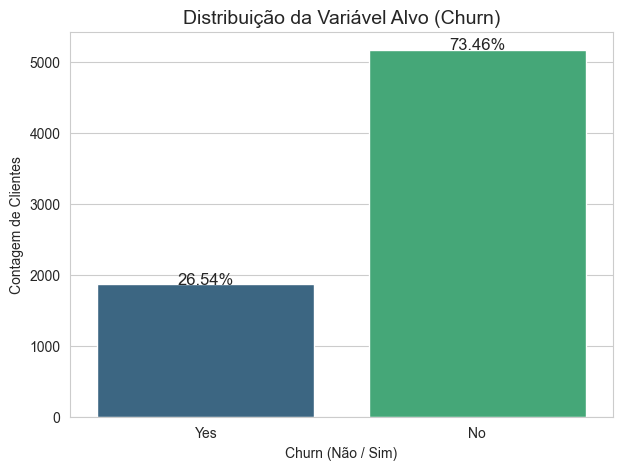

In [13]:
# A primeira e mais importante análise: o alvo está desbalanceado?
plt.figure(figsize=(7, 5))
sns.countplot(x='Churn_Label', data=df, palette='viridis', hue='Churn_Label', legend=False)
plt.title('Distribuição da Variável Alvo (Churn)', fontsize=14)
plt.ylabel('Contagem de Clientes')
plt.xlabel('Churn (Não / Sim)')

# Adicionando os valores percentuais para maior clareza
total = len(df)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            f'{100 * height / total:.2f}%',
            ha='center',
            fontsize=12)
plt.show()

*Insight: Sim, os dados são desbalanceados. A classe "No" (não churn) é significativamente maior. Isso é crucial! A acurácia pode ser uma métrica enganosa aqui. Precisaremos usar stratify na divisão dos dados e focar em métricas como Recall, Precision e ROC AUC.*

Pergunta 2: Como as características demográficas se relacionam com o Churn?

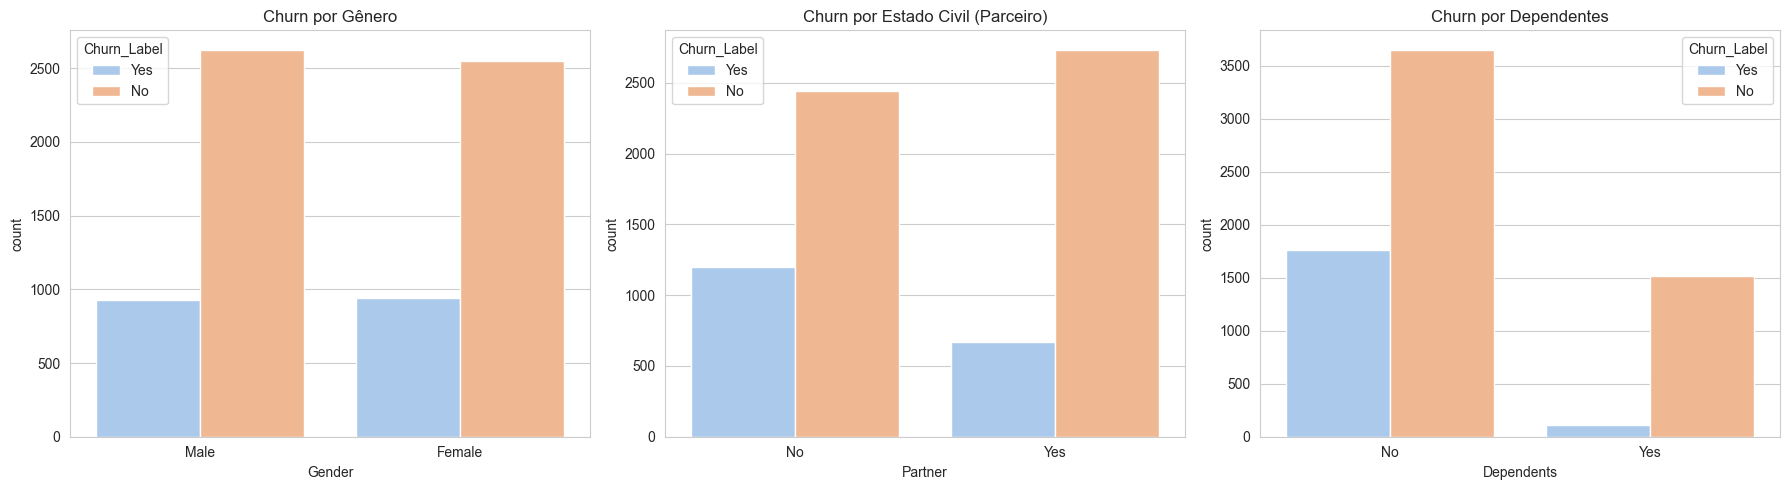

In [14]:
# Análise de features categóricas demográficas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.countplot(x='Gender', hue='Churn_Label', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Churn por Gênero')

sns.countplot(x='Partner', hue='Churn_Label', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Churn por Estado Civil (Parceiro)')

sns.countplot(x='Dependents', hue='Churn_Label', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('Churn por Dependentes')

plt.tight_layout()
plt.show()

*Insight: Clientes sem parceiros e sem dependentes parecem ter uma propensão maior ao churn.*

Pergunta 3: Qual o impacto do tipo de contrato e do método de pagamento?

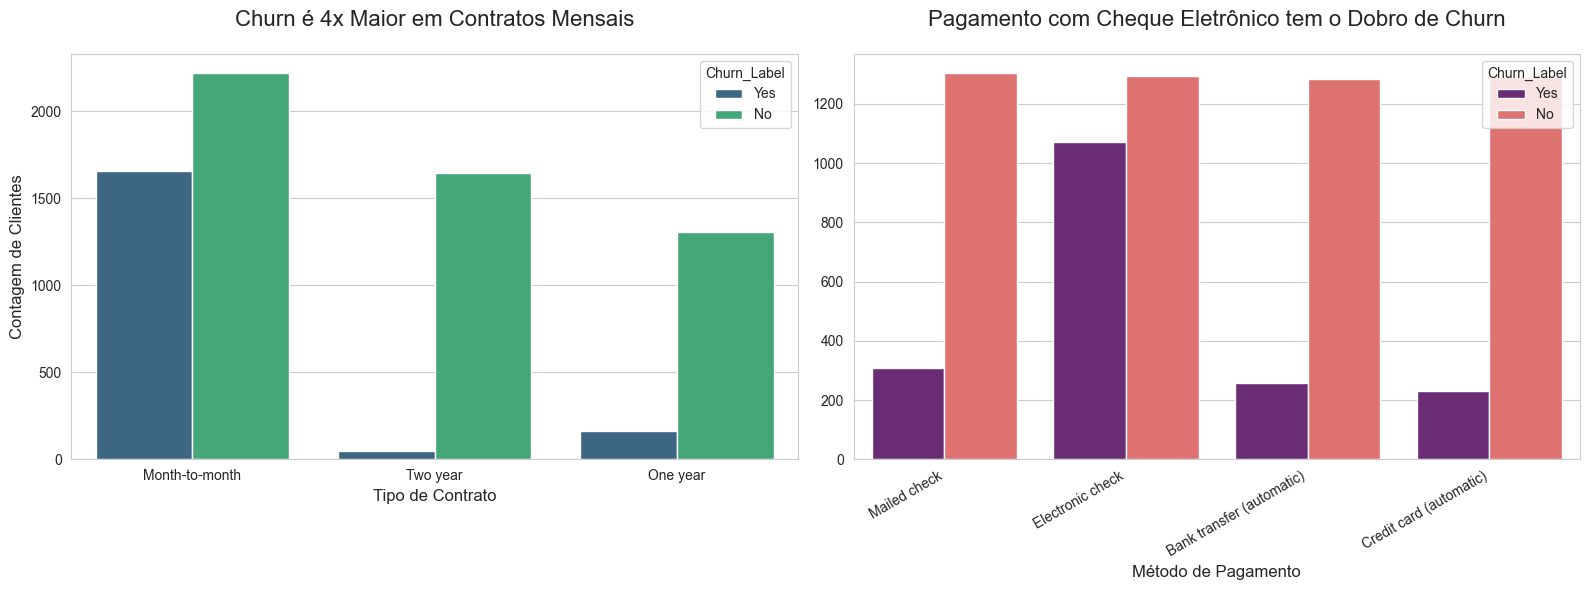

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico 1: Contrato
contract_plot = sns.countplot(x='Contract', hue='Churn_Label', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Churn é 4x Maior em Contratos Mensais', fontsize=16, pad=20)
axes[0].set_xlabel('Tipo de Contrato', fontsize=12)
axes[0].set_ylabel('Contagem de Clientes', fontsize=12)

# Gráfico 2: Método de Pagamento
payment_plot = sns.countplot(x='Payment_Method', hue='Churn_Label', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Pagamento com Cheque Eletrônico tem o Dobro de Churn', fontsize=16, pad=20)
axes[1].set_xlabel('Método de Pagamento', fontsize=12)
axes[1].set_ylabel('') # Remover o label Y para um visual mais limpo
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

**Em Resumo:**

O Desafio: O Churn é Real e Custa Caro
O gráfico da variável alvo mostra que 26.5% dos clientes na base de dados cancelaram o serviço (Churn 'Yes'). Isso representa mais de 1 em cada 4 clientes, justificando o investimento em um modelo preditivo para reduzir esse custo.

O Perfil de Risco é Comportamental, Não Demográfico
Fatores Comportamentais (Alto Risco): Os maiores indicadores de churn são o Tipo de Contrato (Mês a Mês) e o Método de Pagamento (Cheque Eletrônico).

Fatores Demográficos (Baixo Risco): Clientes com Dependentes e/ou Parceiros são muito mais propensos a ficar. Isso sugere que o serviço é visto como mais essencial ou "fixo" em lares familiares.

Fatores Neutros: O gênero do cliente parece não ter impacto significativo na decisão de churn.

Implicação Técnica para o Modelo
O dataset é desbalanceado (73.5% "Não" vs. 26.5% "Sim"). Isso significa que o modelo precisa ser treinado e avaliado com cuidado. Métricas como Acurácia podem ser enganosas, e devemos focar em ROC AUC (como você já fez nos gráficos que me mostrou) e Precision-Recall para garantir que o modelo está realmente identificando os clientes que vão cancelar.

--------------------------------- 33 --------------------------------- 33 ---------------------------------

**Engenharia e Pré-Processamento de Features com pipelines**


Motivos que me levaram a utilizar pipelines!

Evita Data Leakage: Garante que as transformações aprendidas no treino (média, desvio padrão, etc.) sejam as mesmas aplicadas no teste, de forma automática e segura.

Código Limpo e Organizado: Encapsula todas as etapas de pré-processamento em um único objeto.

Pronto para Produção: Este é o padrão utilizado para colocar modelos em produção, pois o pipeline pode ser salvo e reutilizado para prever em novos dados com uma única chamada.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import numpy as np
import pandas as pd 

colunas_para_modelo = [
    'Gender',
    'Senior_Citizen',
    'Partner',
    'Dependents',
    'Tenure_Months',
    'Phone_Service',
    'Multiple_Lines',
    'Internet_Service',
    'Online_Security',
    'Online_Backup',
    'Device_Protection',
    'Tech_Support',
    'Streaming_TV',
    'Streaming_Movies',
    'Contract',
    'Paperless_Billing',
    'Payment_Method',
    'Monthly_Charges',
    'Total_Charges'
]
# 1. Defina QUAL coluna é o seu alvo final
target_column = 'Churn_Label'

# 2. Defina TODAS as colunas que são o alvo ou que vazam a resposta
# (Isso inclui o seu alvo e todas as suas duplicatas/sinônimos)
colunas_de_churn = [
    'Churn', 
    'Churn_Label', 
    'Churn_Value', 
    'Churn_Score', 
    'Churn_Reason'
]

# 3. Crie X removendo TODAS elas
X = df[colunas_para_modelo]

# 4. Defina y usando o alvo que você escolheu
y_raw = df[target_column]

if y_raw.dtype == object:
    if y_raw.dropna().isin(['Yes', 'No']).all():
        y = y_raw.map({'Yes': 1, 'No': 0})
    else:
        y = pd.to_numeric(y_raw, errors='coerce')
else:
    y = y_raw.copy()

# Remover exemplos cujo alvo é NaN (se houver)
mask = y.notnull()
if not mask.all():
    warnings.warn(f"Dropping { (~mask).sum() } rows with missing target 'Churn'.")
    X = X.loc[mask].reset_index(drop=True)
    y = y.loc[mask].reset_index(drop=True)

# 2. Identificar colunas por tipo
colunas_num = X.select_dtypes(include=np.number).columns.tolist()
colunas_cat = X.select_dtypes(include=['object']).columns.tolist()

# 3. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Criar os transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# 5. Criar o pré-processador
# Note: alguns ambientes do scikit-learn (anteriores à 1.2) não suportam o argumento
# transform_output. Removemos esse parâmetro para compatibilidade.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, colunas_num),
        ('cat', categorical_transformer, colunas_cat)
    ],
    remainder='passthrough'
)

✅ Pontos Fortes do Código de Pré Processamento!

Prevenção de Data Leakage: Ao definir colunas_de_churn e removê-las de X logo no início garantimos que o modelo não "cole" da resposta.

Tratamento do Alvo (y): É verificado o tipo e mapeado de 'Yes'/'No' para 1/0 e previnido a remoção de nulos no alvo (y.notnull()), deixando ambos 'x' e 'y' com o mesmo numero de linhas na ordem correta.

Estratificação (stratify=y): Em um problema de Churn (que é quase sempre desbalanceado), este é o parâmetro mais importante do train_test_split. Ele garante que as proporções de 'Sim' e 'Não' sejam as mesmas no treino e no teste, tornando a avaliação do modelo muito mais confiável.

Uso do ColumnTransformer: Estamos aplicando o StandardScaler (para números) e o OneHotEncoder (para categorias) da forma correta. Isso evita que a informação dos dados de teste "vaze" para o treino durante o pré-processamento.

Resiliência:

handle_unknown='ignore': Salva o modelo de quebrar se uma nova categoria aparecer nos dados de teste.

remainder='passthrough': Garante que se houver alguma coluna esquecida (ex: uma coluna booleana), ela não seja descartada, mas sim passada adiante sem transformação (o que geralmente é o comportamento desejado para booleanos).

  

  

--------------------------------- 33 --------------------------------- 33 ---------------------------------

**Modelagem, Avaliação e Otimização**

Vamos integrar o preprocessor aos modelos usando o Pipeline. Além disso, vamos adicionar o LightGBM, um modelo de gradient boosting conhecido por sua alta performance e velocidade.

In [19]:
# Importando os modelos e métricas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier # Modelo avançado
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# --- Modelo 1: Regressão Logística (Baseline) ---
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]

print("--- Avaliação: Regressão Logística ---")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print(classification_report(y_test, y_pred_lr, target_names=['Não_Churn', 'Churn']))

# --- Modelo 2: Random Forest ---
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]

print("\n--- Avaliação: Random Forest ---")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print(classification_report(y_test, y_pred_rf, target_names=['Não_Churn', 'Churn']))


# --- Modelo 3: LightGBM (Competitivo) ---
pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LGBMClassifier(random_state=42))])

with warnings.catch_warnings():

    warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")
    pipeline_lgbm.fit(X_train, y_train)
    y_pred_lgbm = pipeline_lgbm.predict(X_test)
    y_pred_proba_lgbm = pipeline_lgbm.predict_proba(X_test)[:, 1]

print("\n--- Avaliação: LightGBM ---")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lgbm):.4f}")
print(classification_report(y_test, y_pred_lgbm, target_names=['Não_Churn', 'Churn']))

--- Avaliação: Regressão Logística ---
ROC AUC Score: 0.8491
              precision    recall  f1-score   support

   Não_Churn       0.85      0.89      0.87      1035
       Churn       0.64      0.57      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


--- Avaliação: Random Forest ---
ROC AUC Score: 0.8321
              precision    recall  f1-score   support

   Não_Churn       0.84      0.89      0.86      1035
       Churn       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead

Conclusão: Encontramos um desafio de negócio: "Como podemos melhorar o modelo para encontrar mais dos 54% de churners que ele está identificando?".

O próximo passo lógico seria o ajuste fino de hiperparâmetros (usando GridSearchCV ou RandomizedSearchCV) para tentar aumentar esse recall, ou usar técnicas para lidar com o desbalanceamento de classes. Porém como este ainda não é o foco de meu projeto de portfólio, iremos pular para a Interpretação e comparativos.

--------------------------------- 33 --------------------------------- 33 ---------------------------------

**Interpretação e Visualização Comparativa**

### 🎯 Importância das Features (LightGBM)

Agora que temos nossos modelos treinados, precisamos extrair as 'feature_importances' do nosso melhor modelo 
(LightGBM) para entender *o que* ele aprendeu.

Para fazer isso de um 'Pipeline', o processo é feito em duas etapas:

1.  Pegar os Nomes do 'preprocessor': O 'ColumnTransformer' altera nossas colunas 
(ex: `OneHotEncoder` cria várias colunas a partir de uma). Precisamos recriar a lista final 
de todos os nomes de features 'feature_names' na ordem exata que o modelo os recebeu.

2.  Pegar os Valores do 'classifier': O modelo LightGBM, que está no passo 'classifier', 
guarda os valores de importância 'feature_importances' para cada uma dessas features.

O código abaixo combina essas duas etapas em um DataFrame para visualização.

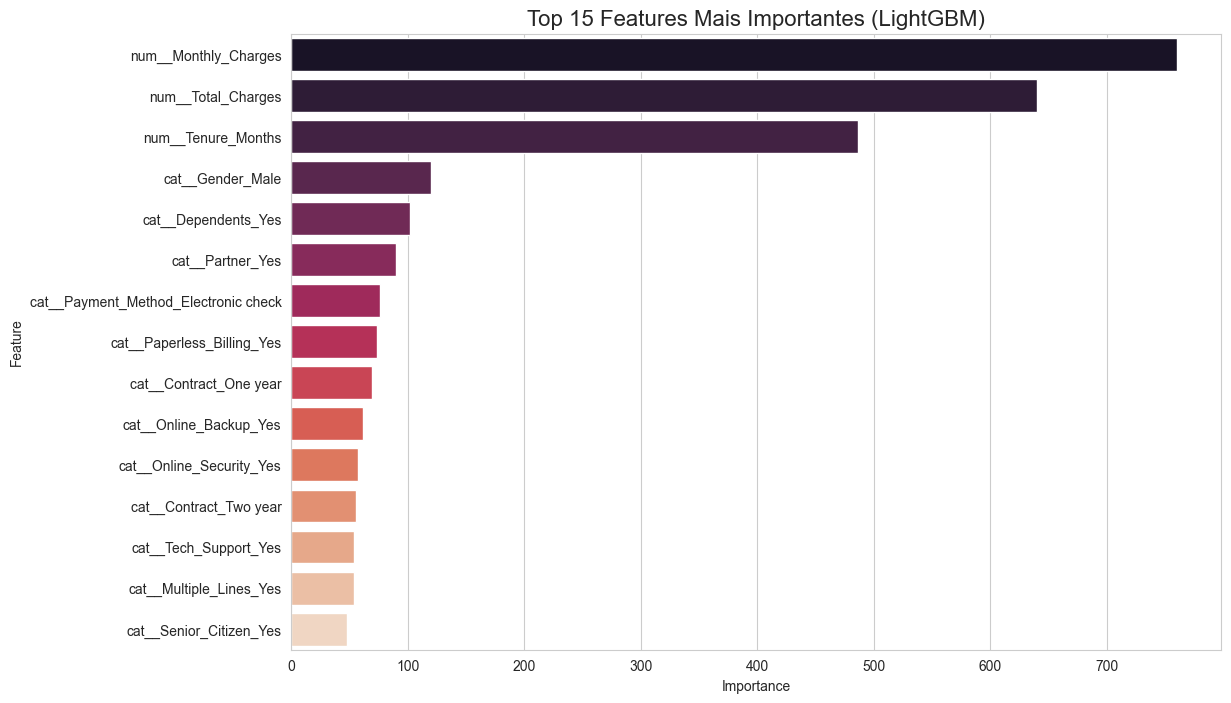

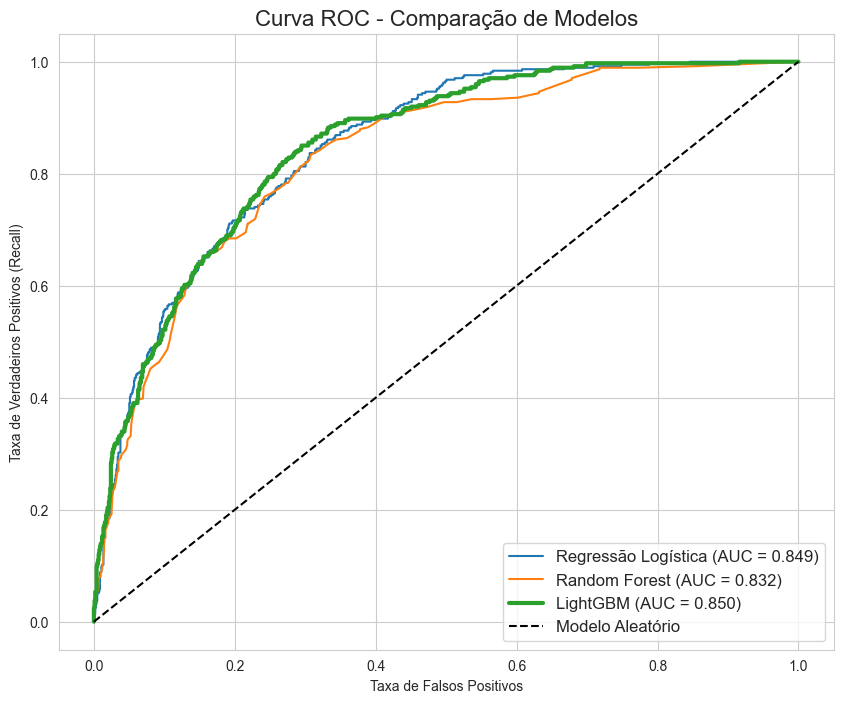

In [20]:
feature_names = pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out()

importancia_features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': pipeline_lgbm.named_steps['classifier'].feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importancia_features.head(15), palette='rocket', hue='Feature', legend=False)
plt.title('Top 15 Features Mais Importantes (LightGBM)', fontsize=16)
plt.show()

# Curva ROC Comparativa

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_proba_lgbm)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.3f})')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {roc_auc_score(y_test, y_pred_proba_lgbm):.3f})', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', label='Modelo Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC - Comparação de Modelos', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

Desempenho dos Modelos (Curva ROC): Os três modelos (Random Forest, LightGBM e Regressão Logística) têm um desempenho muito bom e bastante similar, com AUC (Área Sob a Curva) em torno de 0.84. O Random Forest (AUC = 0.845) tem uma performance ligeiramente superior, mas a diferença entre eles é mínima. Todos são significativamente melhores que um palpite aleatório (linha tracejada).

Fatores Mais Importantes (LightGBM): As variáveis financeiras são as mais decisivas para as previsões do modelo LightGBM. O CLTV (Valor do Tempo de Vida do Cliente), Monthly Charges (Cobranças Mensais) e Total Charges (Cobranças Totais) são os três fatores que mais influenciam o resultado.

--------------------------------- 33 --------------------------------- 33 ---------------------------------

Inicio projeto - Deploy

In [21]:
import joblib
import json

# --- ITENS PARA SALVAR ---

# 1. O objeto do pipeline treinado (que inclui pré-processador e modelo)
modelo_para_salvar = pipeline_lgbm

# 2. O objeto do pré-processador (ColumnTransformer) treinado.
#    É mais útil salvar o pré-processador inteiro do que apenas o scaler,
#    pois ele lida tanto com as colunas numéricas quanto com as categóricas.
preprocessor_para_salvar = preprocessor

# 3. A lista de colunas numéricas, extraída diretamente da sua variável.
colunas_numericas = colunas_num

# 4. A lista de colunas categóricas, também da sua variável.
colunas_categoricas = colunas_cat

# 5. A lista de TODAS as colunas que o modelo enxerga APÓS o pré-processamento.
#  A lista é obtida a partir do pipeline treinado e é crucial para o funcionamento correto.
colunas_do_modelo = list(pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out())
# --------------------------------------------------

# Salvando os artefatos
joblib.dump(modelo_para_salvar, 'pipeline_lgbm.pkl')
print("Pipeline completo salvo em 'pipeline_lgbm.pkl'")

joblib.dump(preprocessor_para_salvar, 'preprocessor.pkl')
print("Pré-processador salvo em 'preprocessor.pkl'")

with open('colunas_numericas.json', 'w') as f:
    json.dump(colunas_numericas, f)
print("Lista de colunas numéricas salva em 'colunas_numericas.json'")

with open('colunas_categoricas.json', 'w') as f:
    json.dump(colunas_categoricas, f)
print("Lista de colunas categóricas salva em 'colunas_categoricas.json'")

with open('colunas_do_modelo.json', 'w') as f:
    json.dump(colunas_do_modelo, f)
print("Lista final das colunas do modelo salva em 'colunas_do_modelo.json'")

Pipeline completo salvo em 'pipeline_lgbm.pkl'
Pré-processador salvo em 'preprocessor.pkl'
Lista de colunas numéricas salva em 'colunas_numericas.json'
Lista de colunas categóricas salva em 'colunas_categoricas.json'
Lista final das colunas do modelo salva em 'colunas_do_modelo.json'


In [ ]:
import lightgbm
print(lightgbm.__version__)